# Data 620 Week6 Assignment 8
#### Raghunathan Ramnath, Dilip Ganesan and Ahmed Sajjad

In [2]:
import nltk
%matplotlib inline
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords

In [3]:
print(nltk.__file__)

C:\Users\raghu\Anaconda3\lib\site-packages\nltk\__init__.py


### 1. Choose a corpus of interest

we have chosen the bible corpus from nltk corpora.

In [5]:
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
sample = gutenberg.raw("bible-kjv.txt")

s_tok=sent_tokenize(sample)

print(s_tok[5:15])


['1:5 And God called the light Day, and the darkness he called Night.', 'And the evening and the morning were the first day.', '1:6 And God said, Let there be a firmament in the midst of the waters,\nand let it divide the waters from the waters.', '1:7 And God made the firmament, and divided the waters which were\nunder the firmament from the waters which were above the firmament:\nand it was so.', '1:8 And God called the firmament Heaven.', 'And the evening and the\nmorning were the second day.', '1:9 And God said, Let the waters under the heaven be gathered together\nunto one place, and let the dry land appear: and it was so.', '1:10 And God called the dry land Earth; and the gathering together of\nthe waters called he Seas: and God saw that it was good.', '1:11 And God said, Let the earth bring forth grass, the herb yielding\nseed, and the fruit tree yielding fruit after his kind, whose seed is\nin itself, upon the earth: and it was so.', '1:12 And the earth brought forth grass, and

### 2. How many total unique words are in the corpus?

I have chosen bible from nltk corpora. As a first step, will remove the stop words such as "a", "the" etc.

In [6]:
bible=nltk.word_tokenize(sample)
print(bible[1:20])


['The', 'King', 'James', 'Bible', ']', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses', ':']


In [7]:
# strip punctuation and numerics using isalpha() method
bible = [w for w in bible if w.isalpha()]
# strip out stop words
bible = [w for w in bible if w not in stopwords.words('english')]

bible_unique = set(bible)
len(bible_unique)

13440

### 3. Taking the most common words, how many unique words represent half of the total words in the corpus? 

In [10]:

# build the frequency distribution using FreqDist()
freq_bible = nltk.FreqDist(bible)

# make a dataframe to produce relative frequencies - top 200
bible_top200 = pd.DataFrame(freq_bible.most_common(200),columns=['word','count'])
bible_top200['rel_freq'] = bible_top200['count']/float(len(bible))
bible_top200.head(10)

,word,count,rel_freq
0,And,12846,0.031070
1,shall,9760,0.023606
2,unto,8940,0.021623
3,I,8854,0.021415
4,LORD,6634,0.016045
5,thou,4890,0.011827
6,thy,4450,0.010763
7,God,4110,0.009941
8,said,3995,0.009663
9,thee,3826,0.009254


### Half the Unique Words


To find the number of most common unique words that make up approximately 50% of the dataset, By plotting the cumulative distribution we can see that approximately 250 words accounts for 50% of all words in the dataset. This is confirmed by summing the first 250 indexes of relative frequencies.

In [16]:
# top 500
bible_top500 = pd.DataFrame(freq_bible.most_common(500),columns=['word','count'])
bible_top500['rel_freq'] = bible_top500['count']/float(len(bible))

In [17]:
len(bible)/2.0   ## half of all words

206727.0

In [18]:
sum(bible_top500[:250]['rel_freq']) # The first 250 words account for approximately half of all words

0.5609112501027932

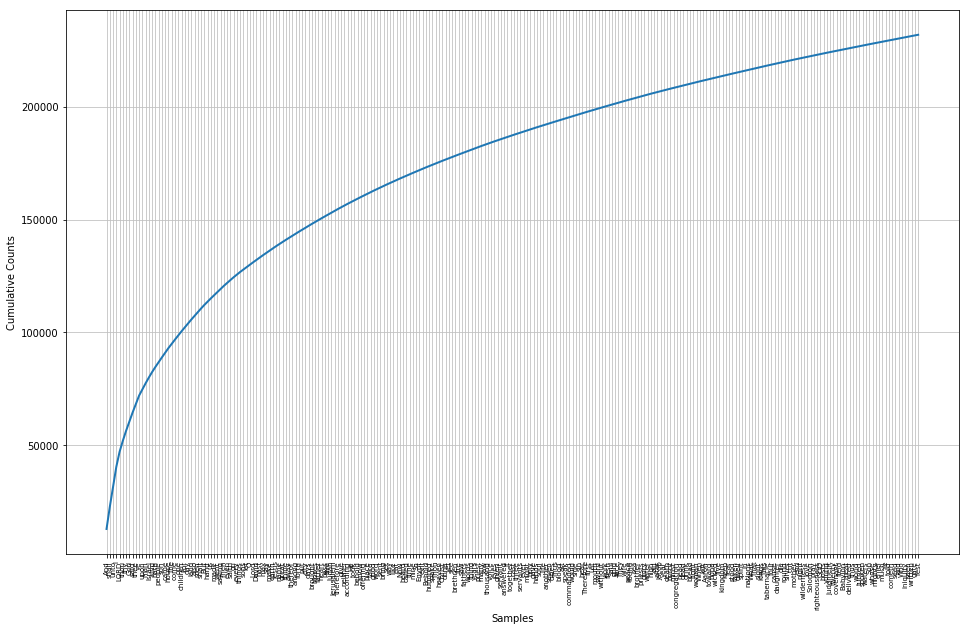

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.rc('xtick', labelsize=7) 
freq_bible.plot(250, cumulative=True)

### 4.  Identify the 200 highest frequency words in this corpus. 

In [23]:
# make a dataframe to produce relative frequencies - top 200
bible_top200 = pd.DataFrame(freq_bible.most_common(200),columns=['word','count'])
bible_top200['rel_freq'] = bible_top200['count']/float(len(bible))
bible_top200.head(10)

,word,count,rel_freq
0,And,12846,0.031070
1,shall,9760,0.023606
2,unto,8940,0.021623
3,I,8854,0.021415
4,LORD,6634,0.016045
5,thou,4890,0.011827
6,thy,4450,0.010763
7,God,4110,0.009941
8,said,3995,0.009663
9,thee,3826,0.009254


### 5. Create a graph that shows the relative frequency of these 200 words. 

I have plotted the first 50 words to view the words clearly. Graph displayed above is plotted with 200 words.

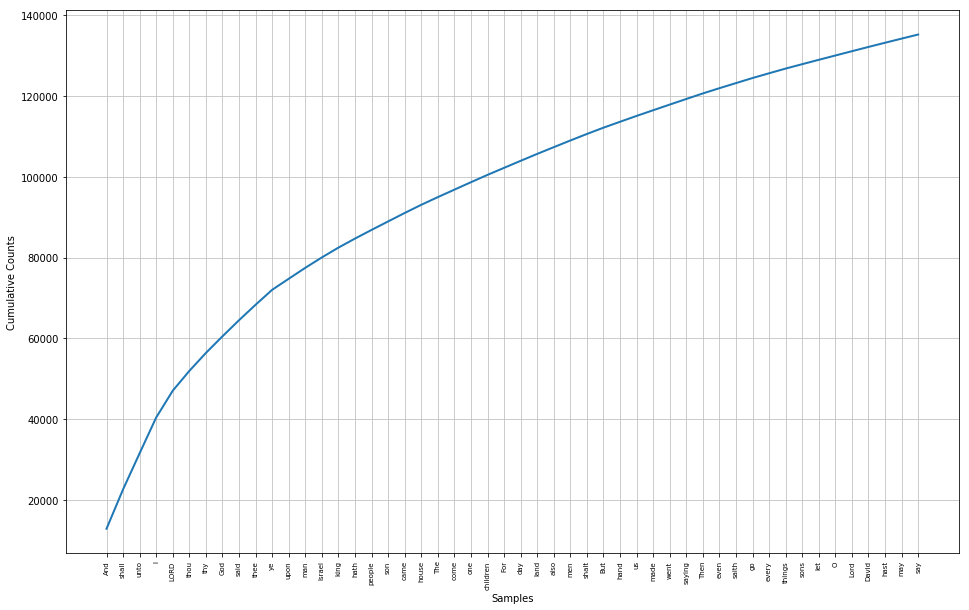

In [25]:

plt.figure(figsize=(16, 10))
plt.rc('xtick', labelsize=7) 
freq_bible.plot(50, cumulative=True)

### 6. Does the observed relative frequency of these words follow Zipf’s law?  Explain.

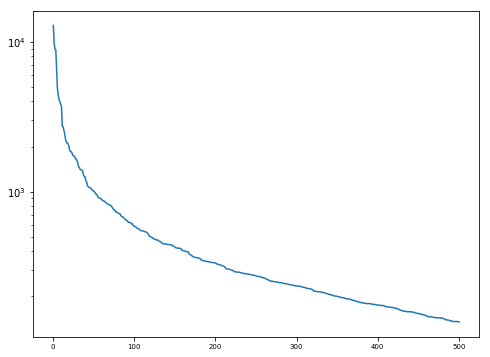

In [28]:
zwords = freq_bible.most_common(500)
x_vec = [i+1 for i in range(len(zwords))]
y_vec = [freq for (word,freq) in zwords]

plt.figure(1, figsize=(8,6))
plt.semilogy(x_vec, y_vec)
plt.show()

Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. On a log scale graph, this would be a straight line. Based on the above graph, its a curved one and not a straight line. As expected, the word "LORD" is used thge maximum in bible. the graph appears to be inversely proportional with some of the words are more frequently used which could be the reason for the curve.


### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

Every corpus is different based on the context. As expected this corpus has some of the frequent words like "GOD", "LORD" etc.